# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
import metpy.calc as mcalc
from metpy.plots import SkewT
from metpy.units import units   
import xarray as xr
from palettable.cartocolors.qualitative import Prism_8
prism = Prism_8.mpl_colors
blue = prism[1]
green = prism[3]
purple = prism[0]
red = prism[7]
yellow = prism[5]
orange = prism[6]
teal = prism[2]

char = 'abcdefg'

colors = [blue,red,yellow,green,purple,orange]

import matplotlib as mpl
from run_params import alt


/home/gleung/miniconda3/envs/aerograd/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
style = '/home/gleung/scripts/styles/bee-paperlight.mplstyle'
plt.style.use(style)

import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# Add every font at the specified location
font_dir = ['/home/gleung/scripts/futura']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams['font.family'] = 'Futura'
rcParams["figure.facecolor"] = 'white'
rcParams['figure.dpi'] = 300  

# Process ERA

In [ ]:
dataPath = f"/camp2e/gleung/era/"

paths = [f"{dataPath}{p}" for p in sorted(os.listdir(dataPath)) if (p.endswith('grib')) and ('201909' in p)]

print(paths)
ds = xr.open_mfdataset(paths, engine='cfgrib')

['/camp2e/gleung/era/era5_20190901_all.grib', '/camp2e/gleung/era/era5_20190902_all.grib', '/camp2e/gleung/era/era5_20190903_all.grib', '/camp2e/gleung/era/era5_20190904_all.grib', '/camp2e/gleung/era/era5_20190905_all.grib', '/camp2e/gleung/era/era5_20190906_all.grib', '/camp2e/gleung/era/era5_20190907_all.grib', '/camp2e/gleung/era/era5_20190908_all.grib', '/camp2e/gleung/era/era5_20190909_all.grib', '/camp2e/gleung/era/era5_20190910_all.grib', '/camp2e/gleung/era/era5_20190911_all.grib', '/camp2e/gleung/era/era5_20190912_all.grib', '/camp2e/gleung/era/era5_20190913_all.grib', '/camp2e/gleung/era/era5_20190914_all.grib', '/camp2e/gleung/era/era5_20190915_all.grib', '/camp2e/gleung/era/era5_20190916_all.grib', '/camp2e/gleung/era/era5_20190917_all.grib', '/camp2e/gleung/era/era5_20190918_all.grib', '/camp2e/gleung/era/era5_20190919_all.grib', '/camp2e/gleung/era/era5_20190920_all.grib', '/camp2e/gleung/era/era5_20190921_all.grib', '/camp2e/gleung/era/era5_20190922_all.grib', '/camp2e/

skipping variable: paramId==170 shortName='stl2'
Traceback (most recent call last):
  File "/home/gleung/miniconda3/envs/aerograd/lib/python3.9/site-packages/cfgrib/dataset.py", line 602, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/gleung/miniconda3/envs/aerograd/lib/python3.9/site-packages/cfgrib/dataset.py", line 536, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='depthBelowLandLayer' value=Variable(dimensions=(), data=0) new_value=Variable(dimensions=(), data=7)
skipping variable: paramId==183 shortName='stl3'
Traceback (most recent call last):
  File "/home/gleung/miniconda3/envs/aerograd/lib/python3.9/site-packages/cfgrib/dataset.py", line 602, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/gleung/miniconda3/envs/aerograd/lib/python3.9/site-packages/cfgrib/dataset.py", line 536, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.Dat

In [22]:
print(ds)

NameError: name 'ds' is not defined

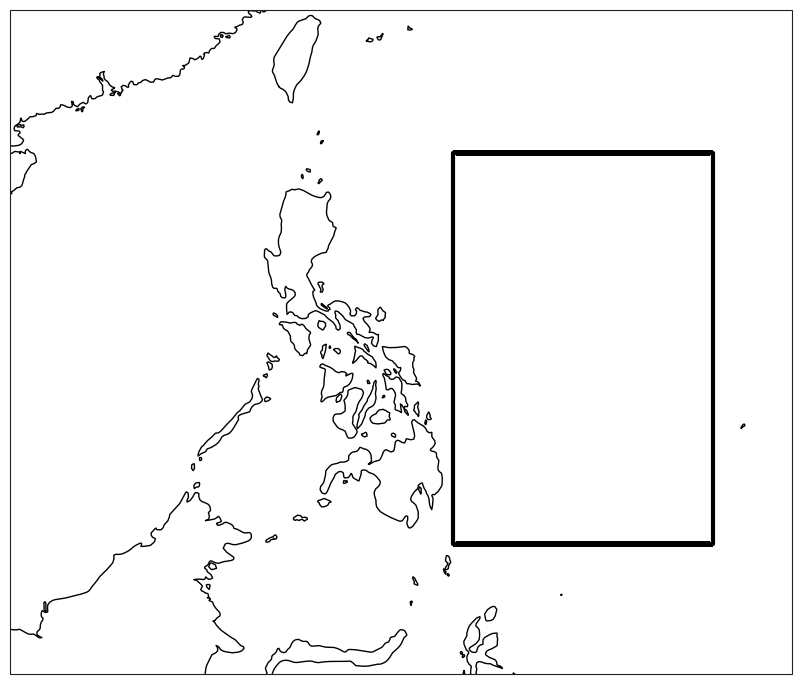

In [3]:
import cartopy
import cartopy.crs as ccrs
from shapely import geometry

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

geom = geometry.box(minx=127,maxx=137,miny=5,maxy=20)
    
ax.add_geometries([geom],crs=ccrs.PlateCarree(), facecolor='white', edgecolor='black', lw=3)

ax.set_extent([110,140,0,25])

plt.show()

In [5]:
sub = ds.sel(latitude=slice(20,5), longitude=slice(127,137))
sub = sub.groupby('isobaricInhPa').mean(...)

In [6]:
era = sub.to_dataframe()[['t','q','u','v']]

# Plot Skewt

In [5]:
print(era)

NameError: name 'era' is not defined

In [9]:
fig = plt.figure(figsize=(8,8))
skew = SkewT(fig, rotation=30)

p = era.index.values * units.hPa
q = era.q.values
T = era.t.values * units.kelvin
Td = mcalc.dewpoint_from_specific_humidity(p,T,q)

skew.plot(p, T,color=blue, marker='o')
skew.plot(p, Td, ls='--',color=blue, label='ERA Only')
skew.ax.legend()
plt.show()

AttributeError: 'Line2D' object has no property ''

<Figure size 800x800 with 0 Axes>

In [10]:
pressures = np.arange(10, 1010, 10)

print(len(pressures))

d = pd.DataFrame([np.interp(pressures,era.index, era[v]) for v in ['t','q','u','v']]).T
d.index = pressures
d.columns = ['t','q','u','v']

for i in range(len(d)//8+1):
    if i ==0:
        print(f"   PS = ", ",".join([f"{v:.2f}" for v in d.index[::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{v:.2f}" for v in d.index[::-1].values[i*8:(i+1)*8]])+",")
print()
for i in range(len(d)//8+1):
    if i ==0:
        print(f"   TS = ", ",".join([f"{v:.2f}" for v in d['t'][::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{v:.2f}" for v in d['t'][::-1].values[i*8:(i+1)*8]])+",")
print()        
for i in range(len(d)//8+1):
    if i ==0:
        print(f"   RTS = ", ",".join([f"{v*1000:.3f}" for v in d['q'][::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{v*1000:.3f}" for v in d['q'][::-1].values[i*8:(i+1)*8]])+",")
print()
for i in range(len(d)//8+1):
    if i ==0:
        print(f"   US = ", ",".join([f"{0:.2f}" for v in d['u'][::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{0:.2f}" for v in d['u'][::-1].values[i*8:(i+1)*8]])+",")
print()        
for i in range(len(d)//8+1):
    if i ==0:
        print(f"   VS = ", ",".join([f"{0:.2f}" for v in d['v'][::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{0:.2f}" for v in d['v'][::-1].values[i*8:(i+1)*8]])+",")
print(len(d))

100
   PS =  1000.00,990.00,980.00,970.00,960.00,950.00,940.00,930.00,
         920.00,910.00,900.00,890.00,880.00,870.00,860.00,850.00,
         840.00,830.00,820.00,810.00,800.00,790.00,780.00,770.00,
         760.00,750.00,740.00,730.00,720.00,710.00,700.00,690.00,
         680.00,670.00,660.00,650.00,640.00,630.00,620.00,610.00,
         600.00,590.00,580.00,570.00,560.00,550.00,540.00,530.00,
         520.00,510.00,500.00,490.00,480.00,470.00,460.00,450.00,
         440.00,430.00,420.00,410.00,400.00,390.00,380.00,370.00,
         360.00,350.00,340.00,330.00,320.00,310.00,300.00,290.00,
         280.00,270.00,260.00,250.00,240.00,230.00,220.00,210.00,
         200.00,190.00,180.00,170.00,160.00,150.00,140.00,130.00,
         120.00,110.00,100.00,90.00,80.00,70.00,60.00,50.00,
         40.00,30.00,20.00,10.00,

   TS =  300.14,299.30,298.46,297.72,297.07,296.42,296.02,295.62,
         295.21,294.78,294.35,293.87,293.39,292.90,292.39,291.89,
         291.38,290.87,290.36,289.85,289.

# Land

In [3]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def latlon(ax):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = False
    gl.ylines = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

NameError: name 'era' is not defined

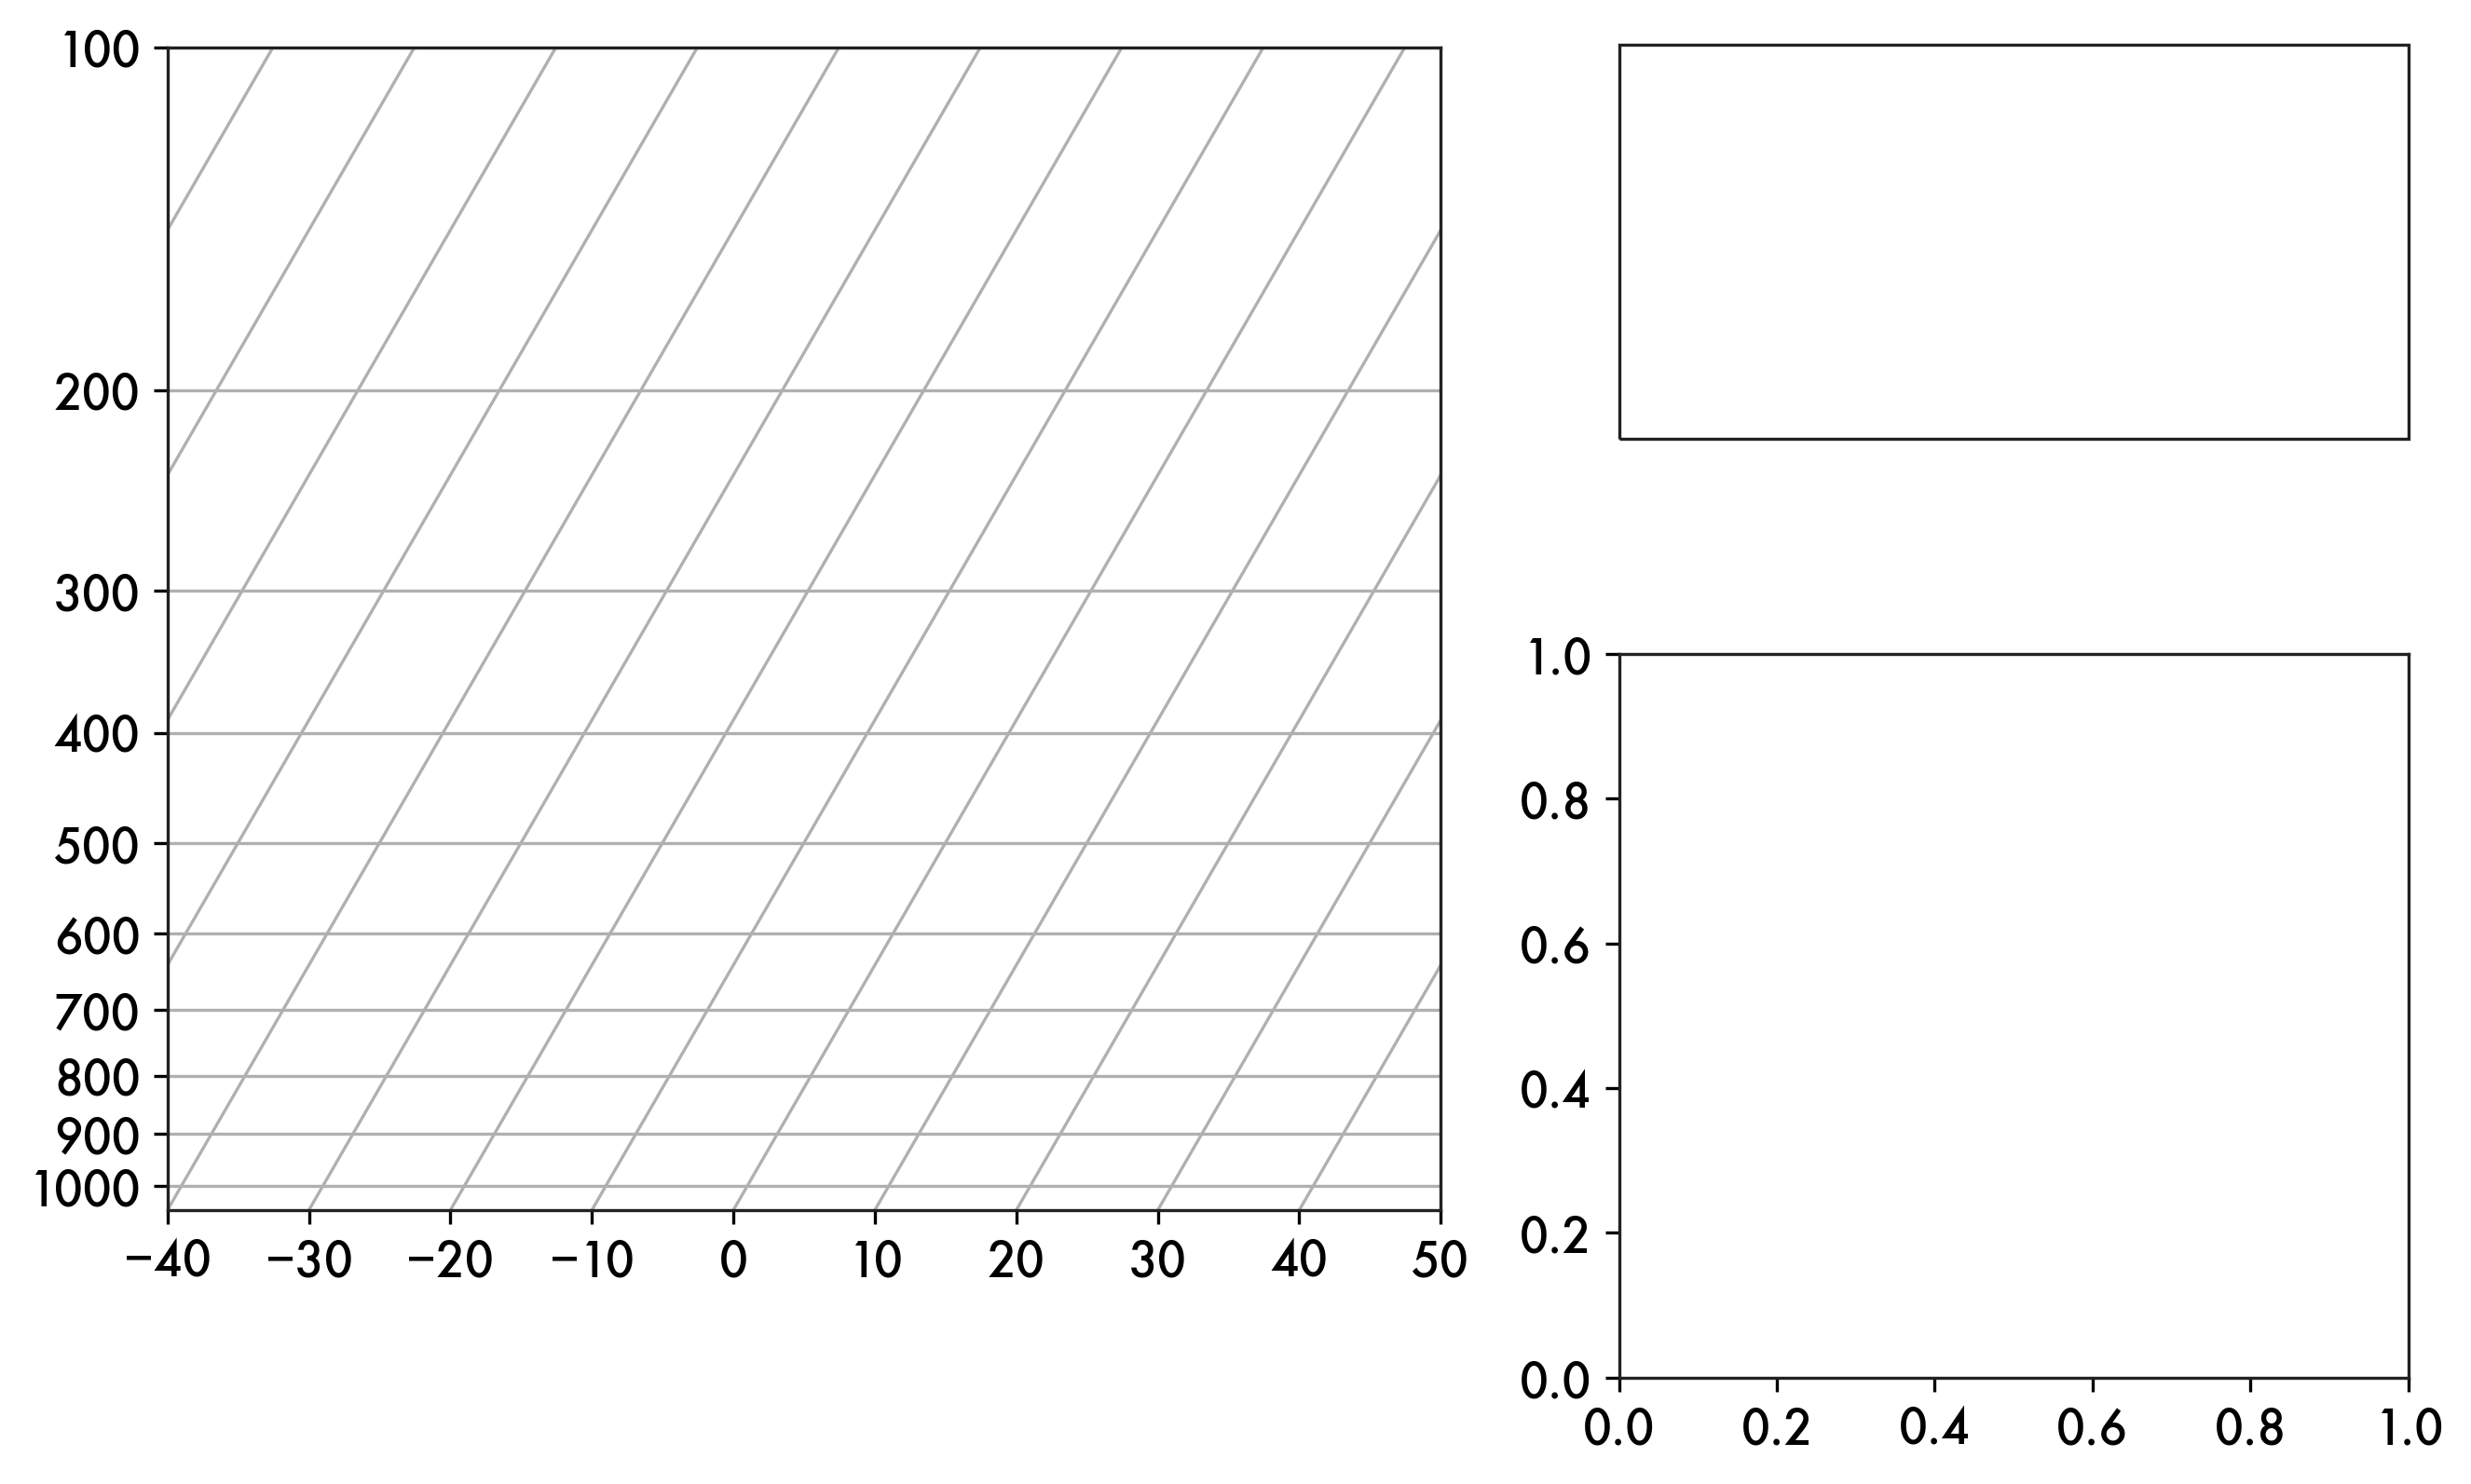

In [4]:
import cartopy
import cartopy.crs as ccrs
from shapely import geometry
import metpy.calc as mpcalc

fig = plt.figure(figsize=(9,6))
gs = gridspec.GridSpec(4,5)

skew = SkewT(fig, rotation=30, subplot=gs[:, :3])
ax = fig.add_subplot(gs[:2,3:],projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[2:,3:])

p = era.index.values * units.hPa
q = era.q.values
T = era.t.values * units.kelvin
Td = mcalc.dewpoint_from_specific_humidity(p,T,q)
skew.ax.set_title('(a)')
skew.plot(p, T,color=red, label = 'T')
skew.plot(p, Td,color=blue, label='T$_d$')

skew.plot_dry_adiabats(colors='gray', lw=1)
skew.plot_moist_adiabats(colors='gray', lw=1)
skew.plot_mixing_lines(colors=green, lw=1)

prof = mpcalc.parcel_profile(p[::-1], T[::-1][0], Td[::-1][0]).to('degC')
skew.plot(p[::-1], prof, 'black')

skew.ax.legend()
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_xlabel('Temperature ($^\circ$C)')
skew.ax.set_xlim(-40,30)
skew.ax.set_ylim(1000,50)

'''ax.coastlines()

geom = geometry.box(minx=120,maxx=122,miny=15.5,maxy=17.5)
    
ax.add_geometries([geom],crs=ccrs.PlateCarree(), facecolor='white', edgecolor='black', lw=3)

latlon(ax)
ax.set_title('(b)')
ax.set_extent([110,130,2.5,25])'''

ax.set_title('(c)')

c = ax.pcolormesh(np.arange(0,100,0.1),
                np.arange(0,100,0.1),
                data)
ax.set_xlabel('Zonal Direction')
ax.set_ylabel('Meridional Direction')

plt.colorbar(c,ax=ax,
            label = 'Surface Aerosol Concentration (# kg$^{-1}$)')

ax2.set_title('(c)')

c = ax2.pcolormesh(np.arange(0,100,0.1),
                np.arange(0,100,0.1),
                ndata)
ax2.set_xlabel('Zonal Direction')
ax2.set_ylabel('Meridional Direction')

plt.colorbar(c,ax=ax2,
            label = 'Surface Aerosol Concentration (# kg$^{-1}$)')

#plt.savefig(f"/camp2e/gleung/aerograd-figures/SetUp.png")
plt.show()

/tmp/ipykernel_12059/3988862825.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(np.arange(0,100,0.1),
/tmp/ipykernel_12059/3988862825.py:56: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax2.pcolormesh(np.arange(0,100,0.1),
/tmp/ipykernel_12059/3988862825.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f"/camp2e/gleung/aerograd-figures/SetUp.png", bbo

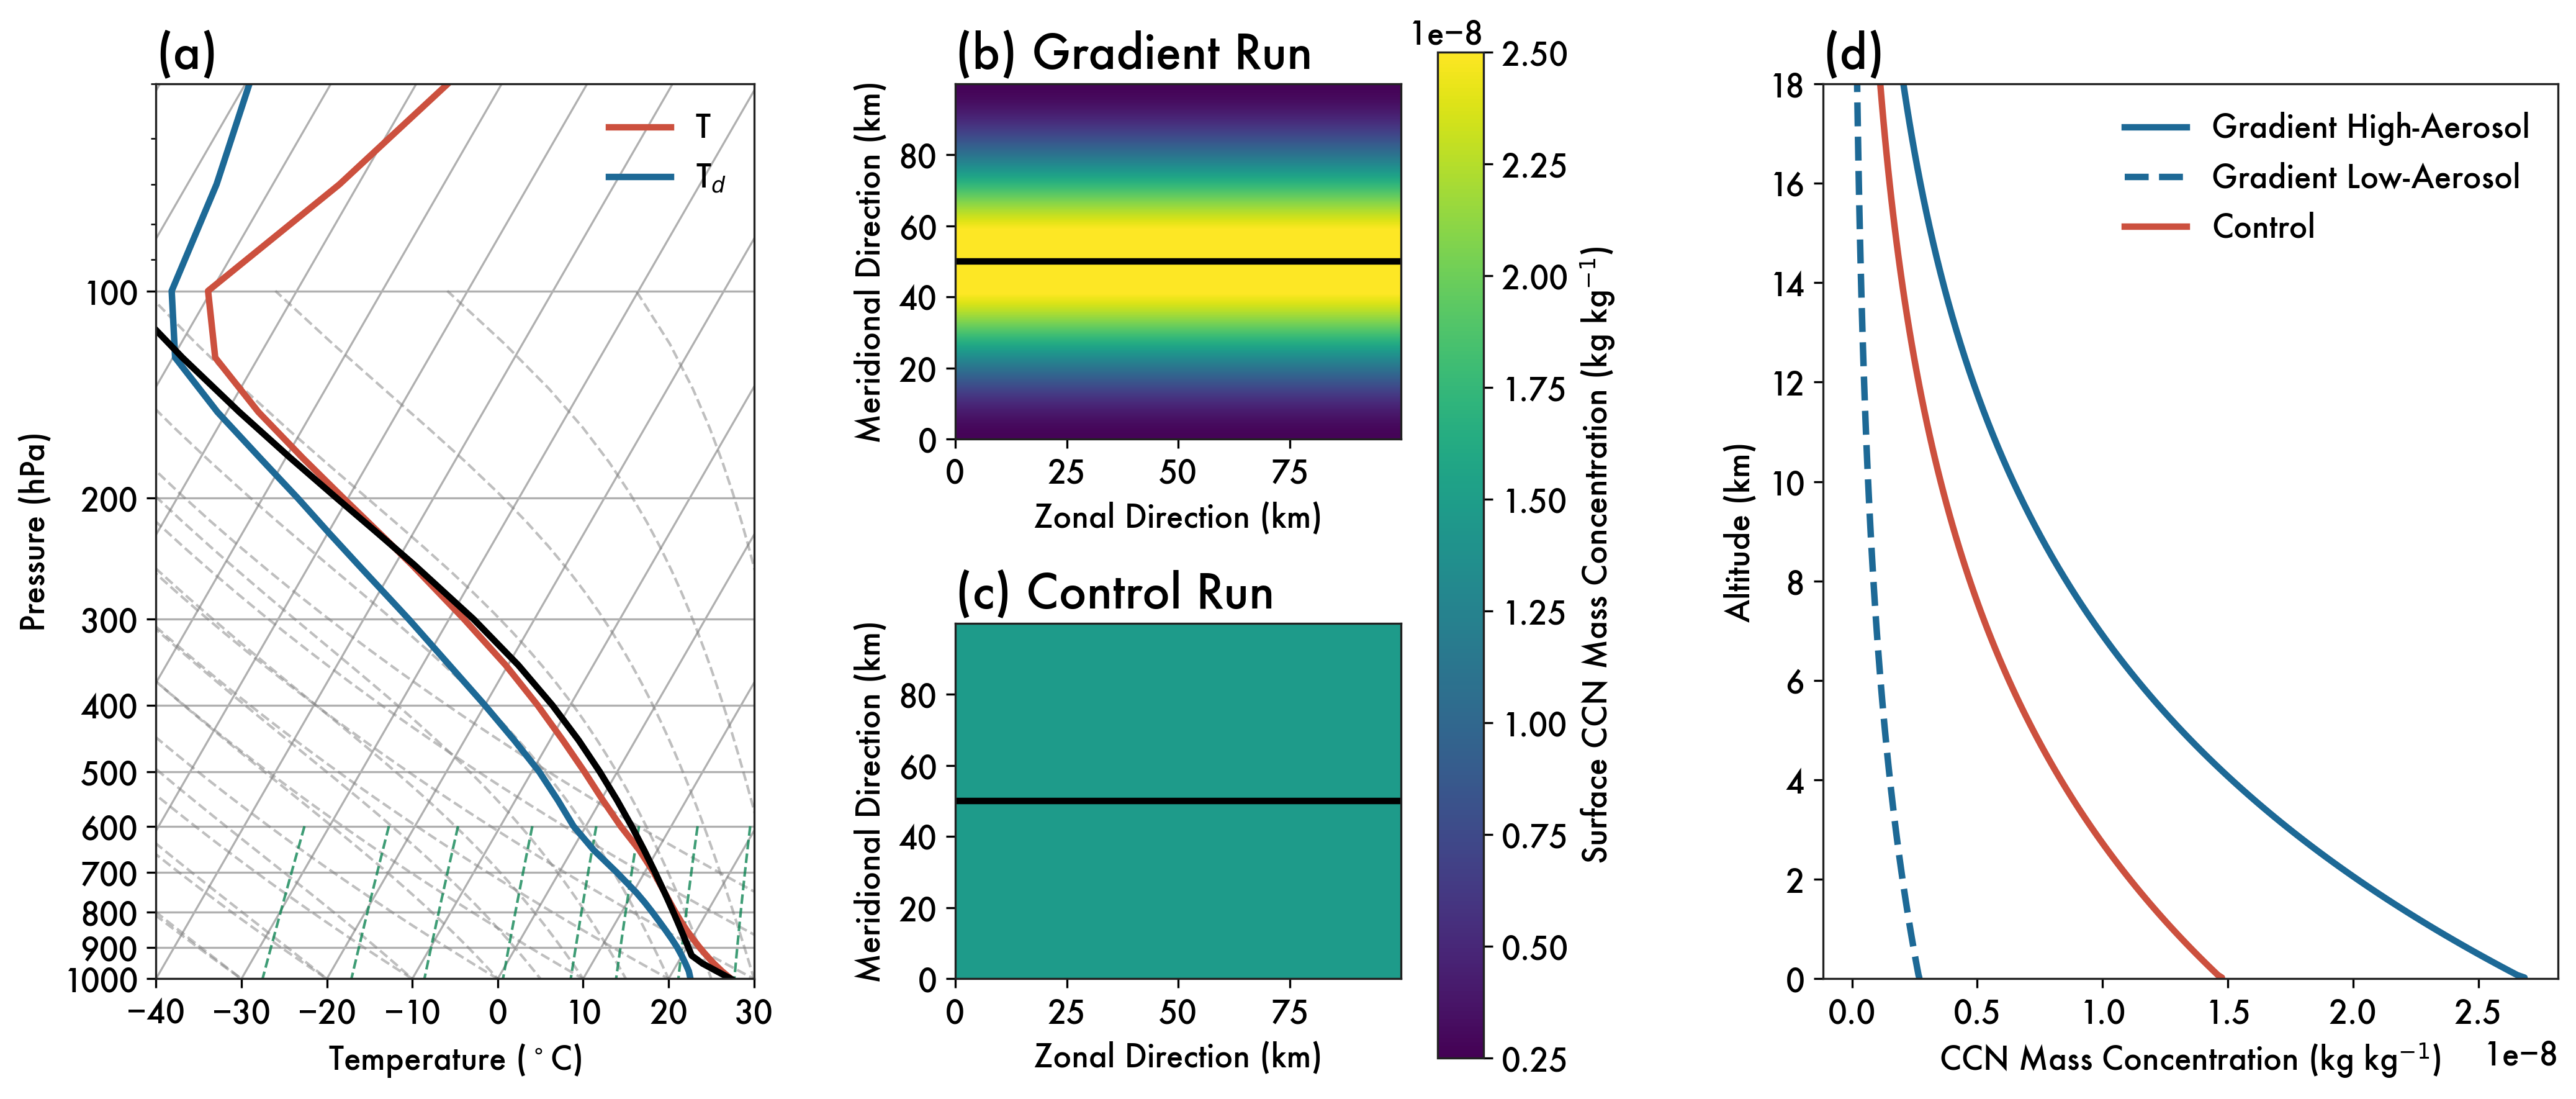

In [16]:
import cartopy
import cartopy.crs as ccrs
from shapely import geometry
import metpy.calc as mpcalc

fig = plt.figure(figsize=(14,6))
gs = gridspec.GridSpec(4,9)

skew = SkewT(fig, rotation=30, subplot=gs[:, :3])
ax = fig.add_subplot(gs[:2,3:5])
ax2 = fig.add_subplot(gs[2:,3:5])
ax3 = fig.add_subplot(gs[:,6:])

p = era.index.values * units.hPa
q = era.q.values
T = era.t.values * units.kelvin
Td = mcalc.dewpoint_from_specific_humidity(p,T,q)
skew.ax.set_title('(a)')
skew.plot(p, T,color=red, label = 'T')
skew.plot(p, Td,color=blue, label='T$_d$')

skew.plot_dry_adiabats(colors='gray', lw=1)
skew.plot_moist_adiabats(colors='gray', lw=1)
skew.plot_mixing_lines(colors=green, lw=1)

prof = mpcalc.parcel_profile(p[::-1], T[::-1][0], Td[::-1][0]).to('degC')
skew.plot(p[::-1], prof, 'black')

skew.ax.legend()
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_xlabel('Temperature ($^\circ$C)')
skew.ax.set_xlim(-40,30)
skew.ax.set_ylim(1000,50)

'''ax.coastlines()

geom = geometry.box(minx=120,maxx=122,miny=15.5,maxy=17.5)
    
ax.add_geometries([geom],crs=ccrs.PlateCarree(), facecolor='white', edgecolor='black', lw=3)

latlon(ax)
ax.set_title('(b)')
ax.set_extent([110,130,2.5,25])'''

ax.set_title('(b) Gradient Run')

ax.pcolormesh(np.arange(0,100,0.1),
                np.arange(0,100,0.1),
                data.T,
              vmax = 2.5e-08, vmin=2.5e-09)
ax.set_xlabel('Zonal Direction (km)')
ax.set_ylabel('Meridional Direction (km)')

ax2.set_title('(c) Control Run')

c = ax2.pcolormesh(np.arange(0,100,0.1),
                np.arange(0,100,0.1),
                ndata.T, 
                   vmax = 2.5e-08, vmin=2.5e-09)

ax2.set_xlabel('Zonal Direction (km)')
ax2.set_ylabel('Meridional Direction (km)')

ax.axhline(50,color='black')
ax2.axhline(50,color='black')

cax = fig.add_axes([ax.get_position().x1 + 0.015, 
                       ax2.get_position().y0,
                       0.0175,
                       ax.get_position().y1 - ax2.get_position().y0])
plt.colorbar(c,cax=cax,
            label = 'Surface CCN Mass Concentration (kg kg$^{-1}$)')

ax3.plot(gprof, alt/1000, color=blue, label = 'Gradient High-Aerosol')
ax3.plot(gprof0, alt/1000, color=blue, ls='--', label = 'Gradient Low-Aerosol')
ax3.plot(nprof, alt/1000, color=red, label = 'Control')

ax3.set_ylim(0,18)
ax3.set_ylabel('Altitude (km)')
ax3.set_xlabel('CCN Mass Concentration (kg kg$^{-1}$)')
ax3.legend()
ax3.set_title('(d)')

plt.savefig(f"/camp2e/gleung/aerograd-figures/SetUp.png", bbox_inches='tight', dpi=300)
plt.show()

In [24]:
print(T.magnitude)
print(p.magnitude)

[213.77025 206.83186 200.94588 192.76714 198.1086  206.84781 215.15894
 222.58939 229.21098 235.1088  244.90845 252.8938  259.30804 264.6558
 269.30722 273.38556 277.2285  281.033   284.20123 286.90323 288.17868
 289.44    290.7096  291.99387 293.3063  294.64447 296.008   297.4131
 298.88916 300.45462]
[  30   50   70  100  125  150  175  200  225  250  300  350  400  450
  500  550  600  650  700  750  775  800  825  850  875  900  925  950
  975 1000]


In [13]:
print(np.max(data),np.min(data))

2.6846372e-08 2.6846372e-09


In [9]:
data = xr.open_dataset(f"/camp2e/gleung/aerograd/grad/a-L-2019-09-16-000000-g1.h5")[['CCCMP']]
gprof = data.sel(phony_dim_1=500, phony_dim_0=500).CCCMP.data
gprof0 = data.sel(phony_dim_1=0, phony_dim_0=0).CCCMP.data
data = data.sel(phony_dim_2=1)
data = data.CCCMP.data.T

ndata = xr.open_dataset(f"/camp2e/gleung/aerograd/nograd/a-L-2019-09-16-000000-g1.h5")[['CCCMP']]
nprof = ndata.sel(phony_dim_1=500, phony_dim_0=500).CCCMP.data
ndata = ndata.sel(phony_dim_2=1)
ndata = ndata.CCCMP.data.T
print(data)

[[2.6848752e-09 2.6855915e-09 2.6867830e-09 ... 2.6855915e-09
  2.6848752e-09 2.6846372e-09]
 [2.6848752e-09 2.6855915e-09 2.6867830e-09 ... 2.6855915e-09
  2.6848752e-09 2.6846372e-09]
 [2.6848752e-09 2.6855915e-09 2.6867830e-09 ... 2.6855915e-09
  2.6848752e-09 2.6846372e-09]
 ...
 [2.6848752e-09 2.6855915e-09 2.6867830e-09 ... 2.6855915e-09
  2.6848752e-09 2.6846372e-09]
 [2.6848752e-09 2.6855915e-09 2.6867830e-09 ... 2.6855915e-09
  2.6848752e-09 2.6846372e-09]
 [2.6848752e-09 2.6855915e-09 2.6867830e-09 ... 2.6855915e-09
  2.6848752e-09 2.6846372e-09]]


In [5]:
print(nprof.CCCNP)

AttributeError: 'numpy.ndarray' object has no attribute 'CCCNP'

In [66]:
print(data.GLAT.mean())

<xarray.DataArray 'GLAT' ()>
array(8.74991, dtype=float32)


In [3]:
sub = ds.sel(latitude=slice(17.5,15.5), longitude=slice(120,122))

NameError: name 'ds' is not defined

In [ ]:
sub = sub.groupby('isobaricInhPa').mean(...)

In [25]:
era = sub[['t','q']].to_dataframe()[['t','q']]

In [8]:
pressures = np.arange(10, 1010, 10)

print(len(pressures))

d = pd.DataFrame([np.interp(pressures,era.index, era[v]) for v in ['t','q']]).T

d.index = pressures
d.columns = ['t','q']

for i in range(len(d)//8+1):
    if i ==0:
        print(f"   PS = ", ",".join([f"{v:.2f}" for v in d.index[::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{v:.2f}" for v in d.index[::-1].values[i*8:(i+1)*8]])+",")
print()
for i in range(len(d)//8+1):
    if i ==0:
        print(f"   TS = ", ",".join([f"{v:.2f}" for v in d['t'][::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{v:.2f}" for v in d['t'][::-1].values[i*8:(i+1)*8]])+",")
print()        
for i in range(len(d)//8+1):
    if i ==0:
        print(f"   RTS = ", ",".join([f"{v*1000:.3f}" for v in d['q'][::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{v*1000:.3f}" for v in d['q'][::-1].values[i*8:(i+1)*8]])+",")
print()
for i in range(len(d)//8+1):
    if i ==0:
        print(f"   US = ", ",".join([f"{0:.2f}" for v in d['t'][::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{0:.2f}" for v in d['t'][::-1].values[i*8:(i+1)*8]])+",")
print()        
for i in range(len(d)//8+1):
    if i ==0:
        print(f"   VS = ", ",".join([f"{0:.2f}" for v in d['t'][::-1].values[i*8:(i+1)*8]])+",")
    else:
        print(f"        ", ",".join([f"{0:.2f}" for v in d['t'][::-1].values[i*8:(i+1)*8]])+",")
print(len(d))

100
   PS =  1000.00,990.00,980.00,970.00,960.00,950.00,940.00,930.00,
         920.00,910.00,900.00,890.00,880.00,870.00,860.00,850.00,
         840.00,830.00,820.00,810.00,800.00,790.00,780.00,770.00,
         760.00,750.00,740.00,730.00,720.00,710.00,700.00,690.00,
         680.00,670.00,660.00,650.00,640.00,630.00,620.00,610.00,
         600.00,590.00,580.00,570.00,560.00,550.00,540.00,530.00,
         520.00,510.00,500.00,490.00,480.00,470.00,460.00,450.00,
         440.00,430.00,420.00,410.00,400.00,390.00,380.00,370.00,
         360.00,350.00,340.00,330.00,320.00,310.00,300.00,290.00,
         280.00,270.00,260.00,250.00,240.00,230.00,220.00,210.00,
         200.00,190.00,180.00,170.00,160.00,150.00,140.00,130.00,
         120.00,110.00,100.00,90.00,80.00,70.00,60.00,50.00,
         40.00,30.00,20.00,10.00,

   TS =  300.45,299.83,299.20,298.59,298.00,297.41,296.85,296.29,
         295.74,295.19,294.64,294.11,293.57,293.04,292.52,291.99,
         291.48,290.97,290.46,289.95,289.

In [36]:
era.to_pickle("Skewt-land.pkl")

In [3]:
import metpy.calc as mcalc
from metpy.plots import SkewT

era = pd.read_pickle("Skewt-land.pkl")

NameError: name 'ocean' is not defined

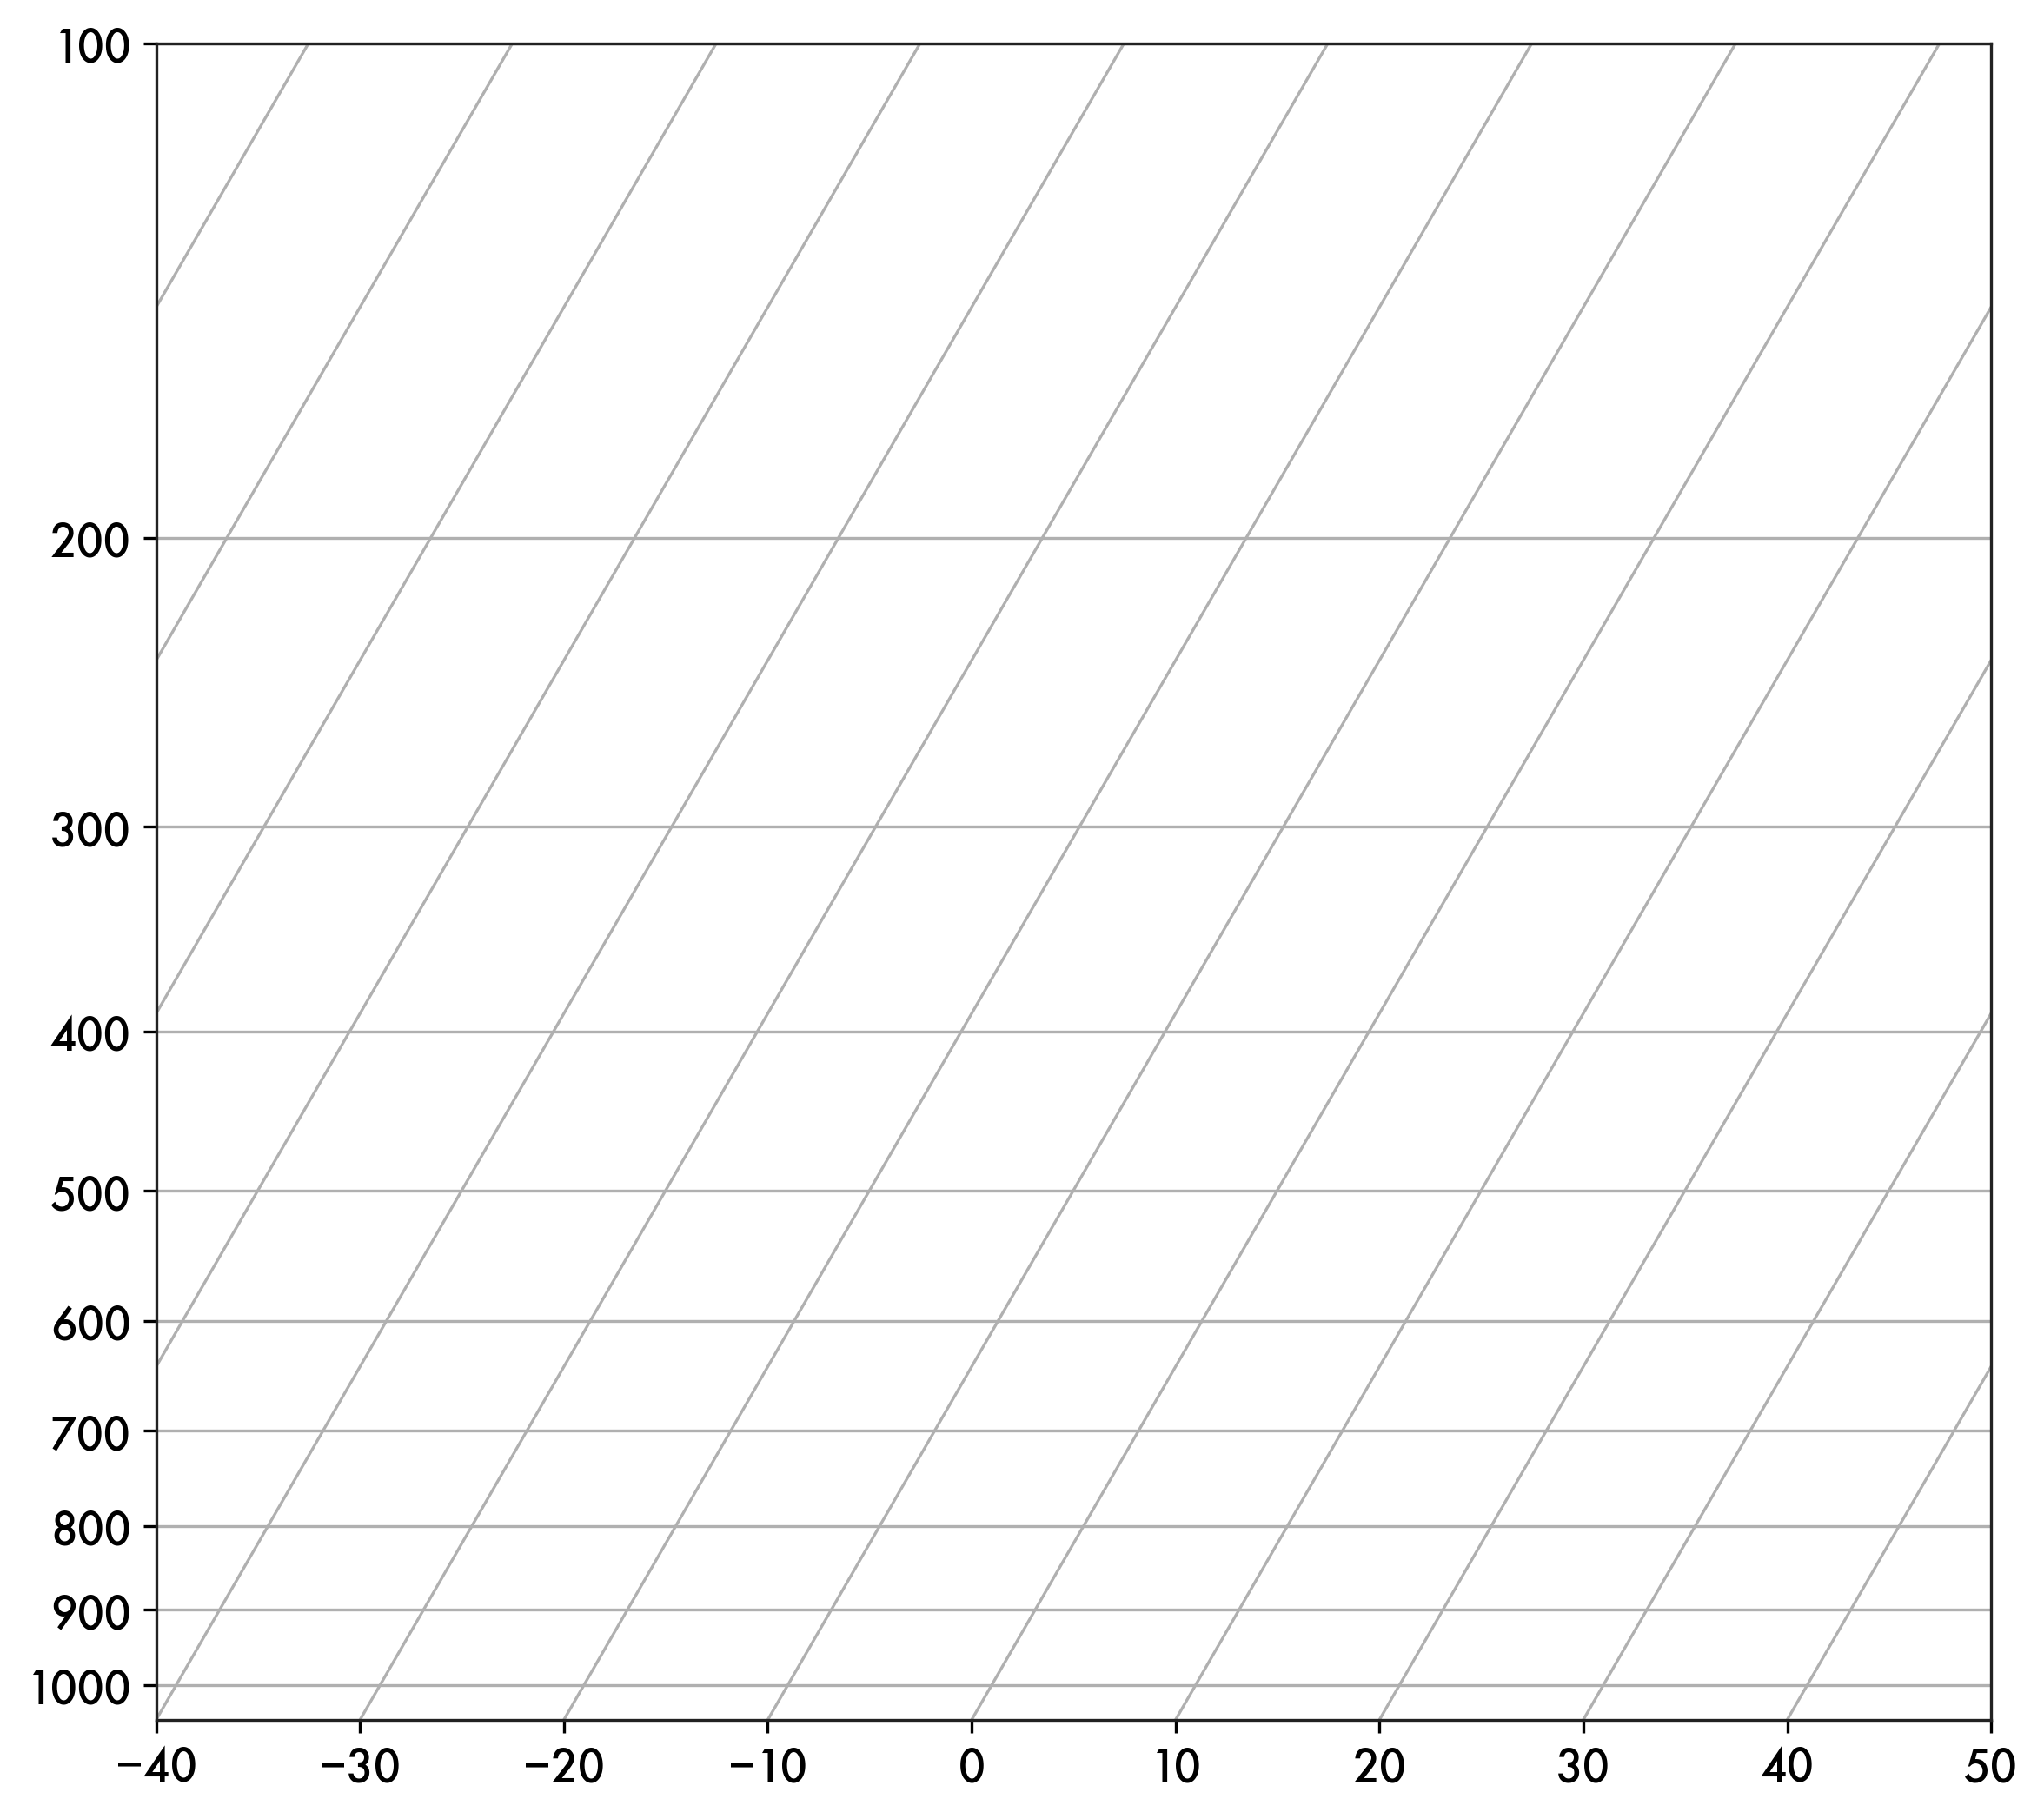

In [10]:

fig = plt.figure(figsize=(8,8))
skew = SkewT(fig, rotation=30)

p = ocean.p.values * units.hPa
q = ocean.q.values
T = ocean.t.values * units.kelvin
Td = mcalc.dewpoint_from_specific_humidity(p,T,q)

skew.plot(p, T,color=blue, marker='o')
skew.plot(p, Td, ls='--',color=blue, label='Ocean')

p = era.index.values * units.hPa
q = era.q.values
T = era.t.values * units.kelvin
Td = mcalc.dewpoint_from_specific_humidity(p,T,q)

skew.plot(p, T,color=red, marker='o')
skew.plot(p, Td, ls='--',color=red, label='Land')
skew.ax.legend()
plt.show()

In [19]:
import io

ocean = pd.read_table(io.StringIO(s), delim_whitespace=True)

In [15]:
s = '''p     t    q  u v                                                                
30             211.581619  0.000002 -14.884595  0.100344
50             205.268753  0.000003 -10.851661  0.063294
70             200.152542  0.000003 -10.538189 -0.165941
100            193.511307  0.000003 -12.296401 -2.278405
125            197.910294  0.000005 -13.396125 -5.757885
150            205.980652  0.000014 -13.452346 -7.462790
175            213.992310  0.000035 -12.570045 -6.686805
200            221.296661  0.000078 -11.420526 -5.241350
225            227.839478  0.000149 -10.165336 -3.770284
250            233.681747  0.000250  -8.880652 -2.445263
300            243.597000  0.000547  -6.540593 -0.404152
350            251.731766  0.000997  -4.583297  0.545006
400            258.542542  0.001598  -3.252624  0.715763
450            264.062012  0.002367  -2.752909  1.138628
500            268.519165  0.003187  -2.012765  1.786909
550            272.493744  0.004069  -0.902086  1.695306
600            276.127808  0.005034   0.148325  1.190489
650            280.049377  0.006172   1.071642  0.919111
700            283.600128  0.007552   1.917852  0.618166
750            286.636932  0.009106   2.548493  0.273998
775            288.011414  0.009878   2.795531  0.229479
800            289.331329  0.010619   3.015188  0.279670
825            290.615814  0.011329   3.201129  0.448598
850            291.889465  0.012046   3.356147  0.729213
875            293.152008  0.012807   3.477709  1.111529
900            294.351624  0.013750   3.517008  1.563106
925            295.422699  0.015080   3.416171  2.037915
950            296.424072  0.016911   3.138330  2.407819
975            298.038269  0.017831   2.787162  2.444622
1000           300.136383  0.018076   2.470618  2.256426'''

In [17]:
print(land)

       p           t         q          u         v
0     30  211.581619  0.000002 -14.884595  0.100344
1     50  205.268753  0.000003 -10.851661  0.063294
2     70  200.152542  0.000003 -10.538189 -0.165941
3    100  193.511307  0.000003 -12.296401 -2.278405
4    125  197.910294  0.000005 -13.396125 -5.757885
5    150  205.980652  0.000014 -13.452346 -7.462790
6    175  213.992310  0.000035 -12.570045 -6.686805
7    200  221.296661  0.000078 -11.420526 -5.241350
8    225  227.839478  0.000149 -10.165336 -3.770284
9    250  233.681747  0.000250  -8.880652 -2.445263
10   300  243.597000  0.000547  -6.540593 -0.404152
11   350  251.731766  0.000997  -4.583297  0.545006
12   400  258.542542  0.001598  -3.252624  0.715763
13   450  264.062012  0.002367  -2.752909  1.138628
14   500  268.519165  0.003187  -2.012765  1.786909
15   550  272.493744  0.004069  -0.902086  1.695306
16   600  276.127808  0.005034   0.148325  1.190489
17   650  280.049377  0.006172   1.071642  0.919111
18   700  28